In [43]:
#Analise 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
#Separação
from sklearn.model_selection import train_test_split
#Transformação 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Treinamento 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor  
#Teste e Avalição
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix,classification_report
from sklearn.metrics import cohen_kappa_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Nomes: RM:
- Felipe Gabriel Correa da Silva RM 85487
- Carlos Henrique Neves Júnior RM 82378
- Guilherme Rosa Campanha RM 84162
- Rafael Ramalho Mansur Meira RM 84670
- Isabela Brito Pessoa RM 85912
- Marcos Moura dos Santos RM 86507

In [44]:
df = pd.read_csv("ford.csv") 

 Analise dos Dados
 
 primeiro vamos entender os dados

In [45]:
#função para saber com quantos dados estamos trabalhando
df.shape

(17966, 9)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


Não precisaramos apagar linhas, pois não exitem dados divergentes ou nulos

In [47]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


para ter uma visualização melhor, temos as  estatísticas básicas 

In [48]:
df['price'].groupby(df['model']).describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
B-MAX,355.0,8287.526761,1754.847361,4499.0,6990.50,8300.0,9500.00,12499.0
C-MAX,543.0,9914.567219,2556.454220,1775.0,8699.50,10000.0,11440.00,17995.0
EcoSport,1143.0,12499.268591,3182.153932,6420.0,9750.00,12200.0,15000.00,22450.0
Edge,208.0,22810.500000,5070.270802,14998.0,19497.25,20987.0,24812.50,36000.0
Escort,1.0,3000.000000,NaN,3000.0,3000.00,3000.0,3000.00,3000.0
Fiesta,6557.0,10196.298002,2888.952250,694.0,8295.00,9995.0,11695.00,25999.0
Focus,4588.0,13185.882956,4509.766122,495.0,10099.75,12790.0,16500.00,54995.0
Fusion,16.0,2555.812500,862.361813,1450.0,2045.00,2443.0,2785.00,4750.0
Galaxy,228.0,17841.872807,5101.977891,1995.0,16614.75,18000.0,19995.00,29499.0


também achamos interessante identificar as estatísticas dos preços agrupadas pelos modelos


In [49]:
df.groupby('model')['price'].mean().sort_values(ascending=False)

model
 Mustang                  34631.263158
 Edge                     22810.500000
 Puma                     21447.250000
 Tourneo Custom           21165.985507
 Galaxy                   17841.872807
 S-MAX                    17720.226351
 Kuga                     15823.472360
 Grand Tourneo Connect    14874.915254
 Ranger                   14495.000000
 Tourneo Connect          13805.818182
 Focus                    13185.882956
 EcoSport                 12499.268591
 Transit Tourneo          12450.000000
 Mondeo                   12305.709125
 Grand C-MAX              10881.574899
 Fiesta                   10196.298002
 C-MAX                     9914.567219
 Ka+                       8707.856874
Focus                      8299.000000
 B-MAX                     8287.526761
 KA                        5186.125628
 Escort                    3000.000000
 Fusion                    2555.812500
 Streetka                  1924.500000
Name: price, dtype: float64

partindo da mesma ideia anterior, só que pra identificar modelos mais caros ou mais baratos

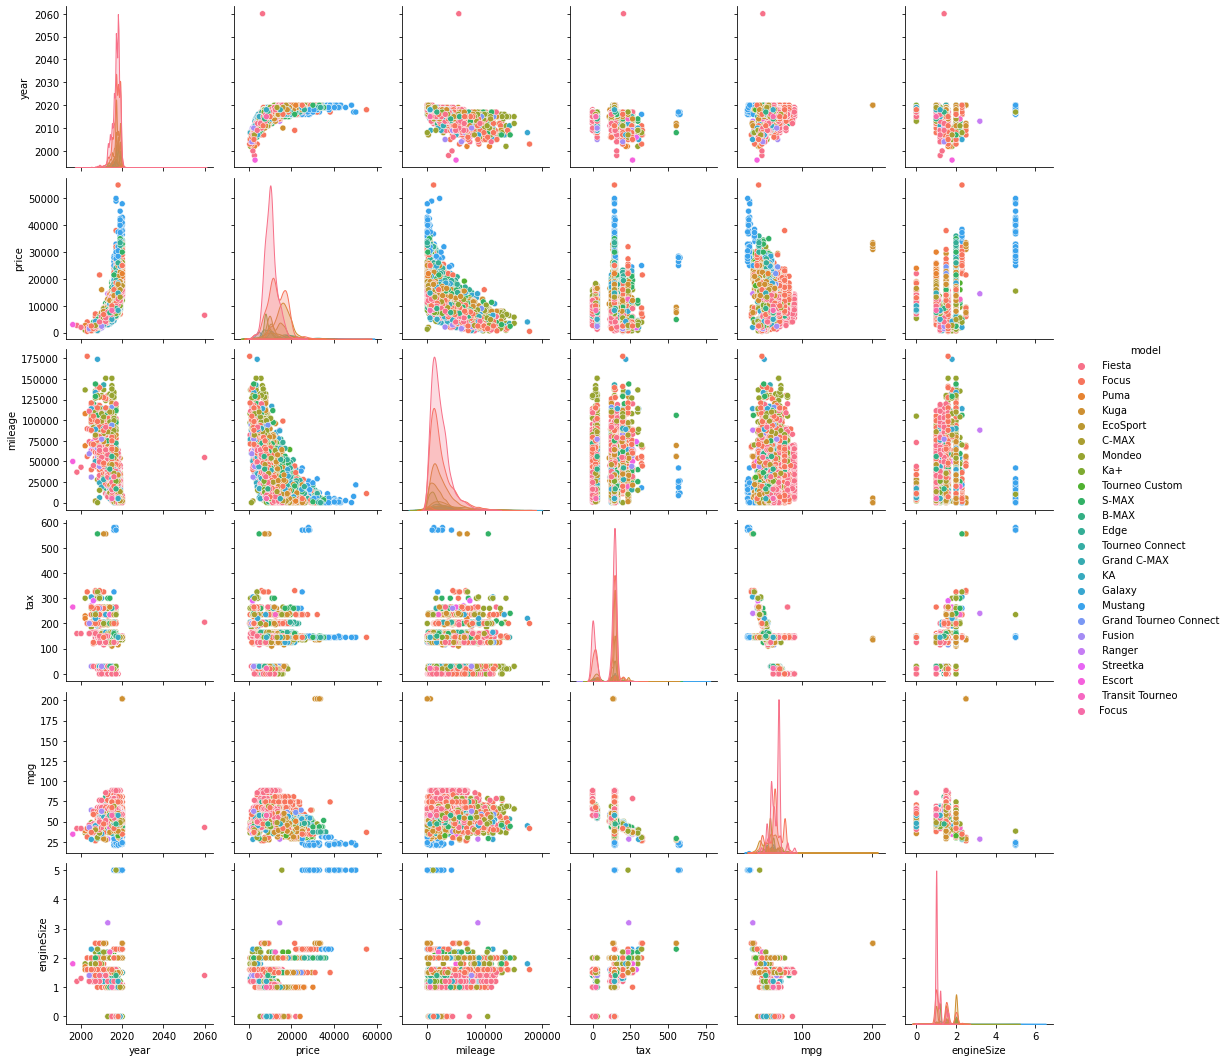

In [50]:
#(H)
sns.pairplot(df, hue="model")

também é importante saber como nossos dados estão distribuidos

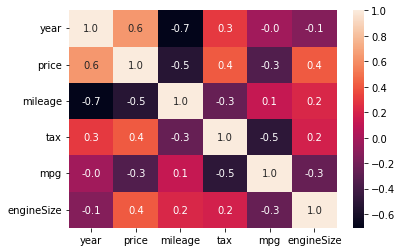

In [51]:
sns.heatmap(df.corr(), annot=True, fmt=".1f");

O que pretendemos predizer é o preço, e segundo a tabela de correlação, as colunas que estão mais relacionadas, são year, tax, engine size respectivamente;

In [52]:
## def converte_transmissao(transmissao):
##    if transmissao == 'manual':
##        return 0
##    else:
##        return 1
## df['transmission'] = df['transmission'].apply(converte_transmissao)

## def converte_fuel(fuel):
##    if fuel == 'Diesel':
##        return 0
##    else:
##        return 1
## df['fuelType'] = df['fuelType'].apply(converte_fuel) 

Poderiamos converter a colunas FuelType e Transmission para valores númericos, porém serão duas colunas que não iremos utilizar no treinamento do algoritmo, então apenas deixamos ai a possibilidade  

In [53]:
x = df.drop(columns = ['price', 'model','fuelType','transmission','mileage'])
y = df['price'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Com toda analise feita, podemos começar a separar nossos dados, então decidimos manter as colunas mais correlacionadas, e abordamos a metodologia 80/20 de separação treino e teste 

In [54]:
scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Como os dados estão em unidades diferentes, achamos importante fazer o Escalonamento para normalização desses dados

In [55]:
from sklearn.tree import DecisionTreeRegressor  # Arvore de decisão para regressão

Dos Algoritmos que testamos, a Arvore de decisão foi o que teve um desempenho melhor para o treinamento dos dados

In [56]:
reg_dt = DecisionTreeRegressor(random_state=0)
reg_dt.fit(x_train_scaled, y_train) 

DecisionTreeRegressor(random_state=0)

In [57]:
y_pred_dt = reg_dt.predict(x_test_scaled)

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_pred_dt) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_pred_dt) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)


R2:  0.8934893378232871
MAE:  1032.120458778166


E para finalizar temos o nosso teste, em que teve um resultado muito bom para o R2, e também teve uma média de erro bem pequena  